## Assignment - Surprise Housing
The solution is divided into the following sections:

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


   ### 1. Data Understanding and Exploration
Let's now have a look at the dataset and understand the size, attribute names etc. in it.

## <font color='blue'>1. Data understanding, preparation and EDA</font>

### <font color='blue'>1.1 Imports</font>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, scale
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### <font color='blue'>1.2 Data Loading and understanding</font>

In [11]:
# read and display top rows of dataset
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
print('Shape: ', df.shape)
print('\nInfo: ')
df.info()
print('\nDescribe: ')
df.describe()

Shape:  (1460, 81)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-n

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### <font color='blue'>Observations:</font>
- Dataset has 81 Columns and 1460 Rows
- Dataset is having null values
    - have to list percentage of null values
    - decide if columns
        - have to be dropped 
        - filled basing on data-definition
        - imputed with median / mean value
- Columns:
    - Numeric: 34
    - Categorical: 43
    - Year (date): 4
- Can drop Id as its just the id 
- Map numerical values in categorical variables
    - MSSubClass
    - OverallQual
    - OverallCond
- Need to create dummy variables for other categorical variables
- Create new variable: age basing on the best fit year column

### <font color='blue'>1.3 Data preparation</font>

#### <font color='blue'>1.3.1: Dropping columns</font>
- Id: as its just the id 

In [13]:
# dropping the obvious columns basing data-definition
df.drop('Id', axis=1, inplace=True)

#### <font color='blue'>1.3.2: Analyze and Fix Dataset null values</font>
- Check percentage of null values
- Drop top most basing on 40% threshold
- Impute NA with 
    - default value basing on data-definition
    - median / mean

In [14]:
# check for percentage missing values
percent_missing = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
MSSubClass       0.000000
dtype: float64

In [15]:
# Here we are dropping Columns with high missing values ,above 40%
percent_missing_threshold = 40

missing_drop_columns = list(percent_missing.index[percent_missing > percent_missing_threshold])
missing_other_columns = list(percent_missing.index[(percent_missing < percent_missing_threshold) & (percent_missing > 0)])
missing_numerical_columns = list(df[missing_other_columns].select_dtypes(include=np.number).columns)
missing_categorical_columns = list(df[missing_other_columns].select_dtypes(include=object).columns)

In [1037]:
# dropping top missing value columns basing on 40% threshold
df.drop(missing_drop_columns, axis=1, inplace=True)

In [1038]:
# describing the other missing numerical columns having <= 40% to impute data
df[missing_numerical_columns].describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


In [1039]:
# outlier noticed, so imputing with median
df['LotFrontage']= df.LotFrontage.fillna(df.LotFrontage.median())
# no visual outlier noticed, so imputing with mean
df['GarageYrBlt']= df.GarageYrBlt.fillna(df.GarageYrBlt.mean())
# outlier noticed, so imputing with median
df['MasVnrArea']= df.MasVnrArea.fillna(df.MasVnrArea.median())

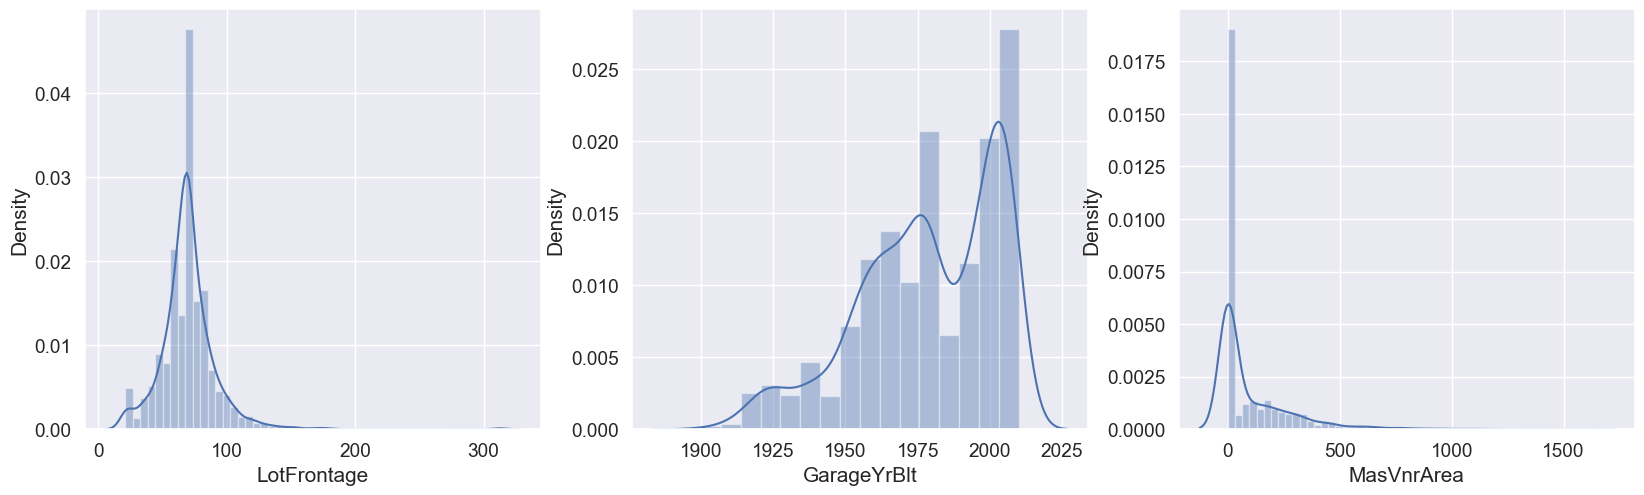

In [1040]:
# visualize numerical columns after imputing
plt.figure(figsize=(20, 12))

for i,c in enumerate(missing_numerical_columns):
    plt.subplot(2,3,i+1)
    sns.distplot(df[c])

plt.show()

In [1041]:
missing_categorical_columns

['GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtCond',
 'BsmtQual',
 'BsmtFinType1',
 'Electrical']

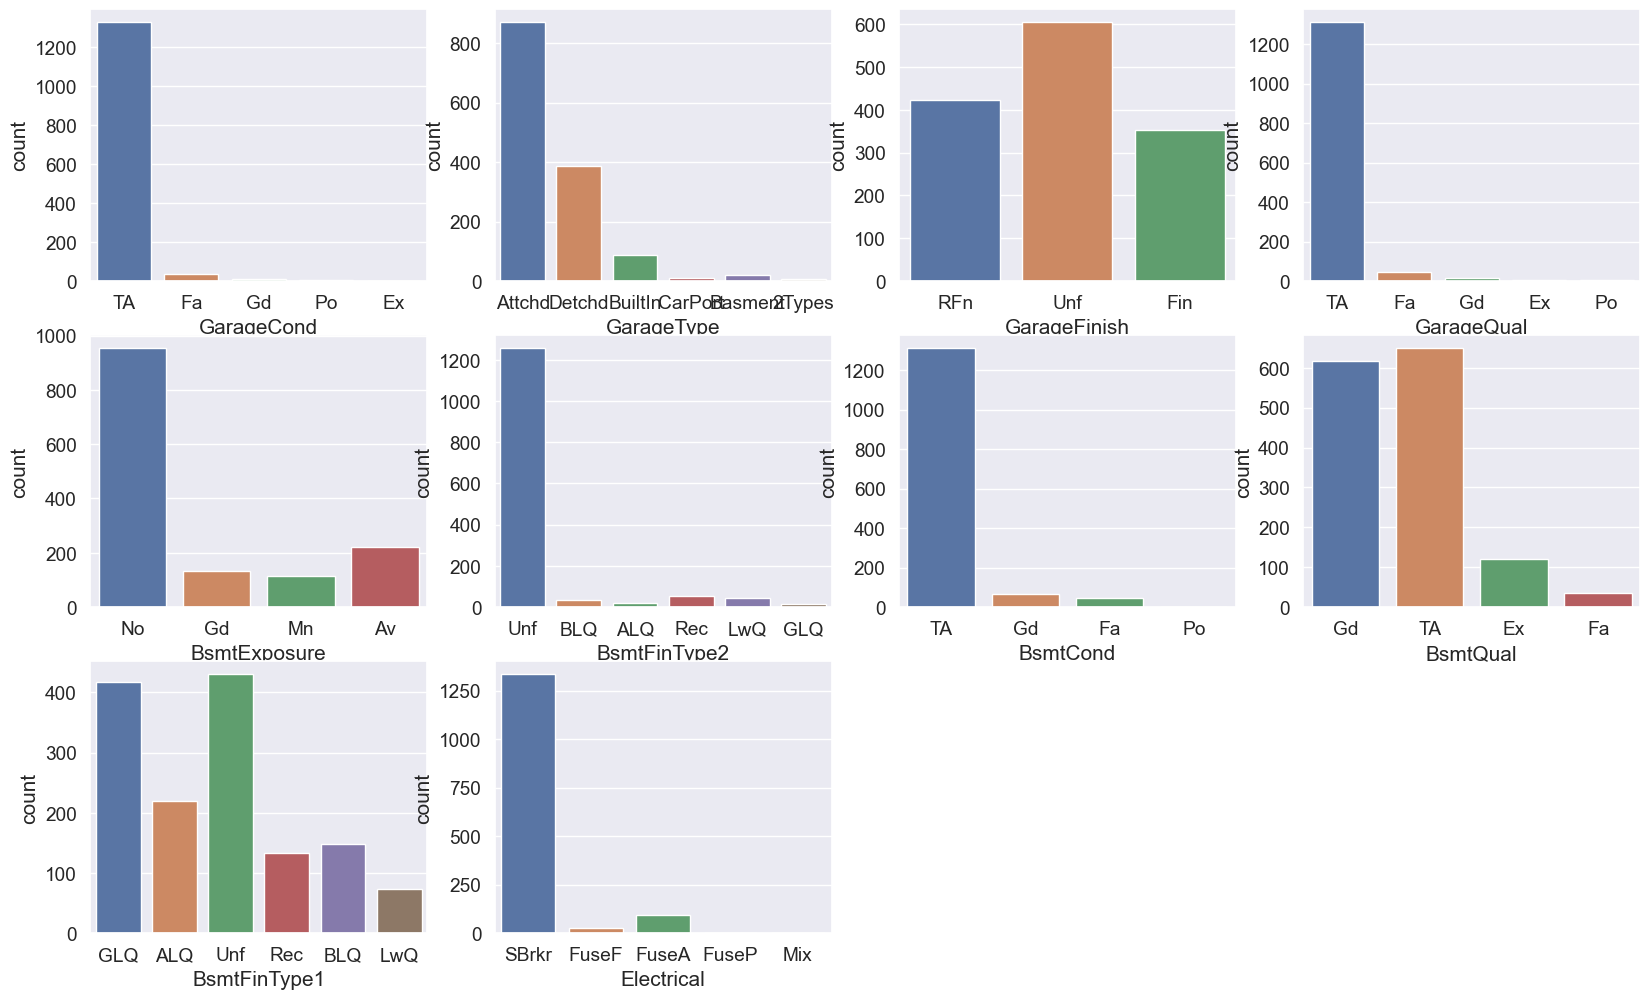

In [1042]:
# visualizing the remaining missing categorical columns
plt.figure(figsize=(20, 12))

for i,c in enumerate(missing_categorical_columns):
    plt.subplot(3,4,i+1)
    sns.countplot(x=c, data=df)

plt.show()

In [1043]:
# fill NA basing on the data definition
df['GarageCond'] = df['GarageCond'].fillna('No Garage')
df['GarageType'] = df['GarageType'].fillna('No Garage')
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')
df['GarageQual'] = df['GarageQual'].fillna('No Garage')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Basement')
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')

# as there is no default value for NA, basing on data definition, replacing with top option
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [1044]:
# converting numerical columns which can be categorized, for dummy variable creation
# basing on data-definition

df['MSSubClass'] = df['MSSubClass'].map({20:'1-STORY 1946 & NEWER ALL STYLES',
                                          30:'1-STORY 1945 & OLDER',
                                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                          50:'1-1/2 STORY FINISHED ALL AGES',
                                          60:'2-STORY 1946 & NEWER',
                                          70:'2-STORY 1945 & OLDER',
                                          75:'2-1/2 STORY ALL AGES',
                                          80:'SPLIT OR MULTI-LEVEL',
                                          85:'SPLIT FOYER',
                                          90:'DUPLEX - ALL STYLES AND AGES',
                                          120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                          150:'1-1/2 STORY PUD - ALL AGES',
                                          160:'2-STORY PUD - 1946 & NEWER',
                                          180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                          190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'
                                   })

df['OverallQual'] = df['OverallQual'].map({10:'Very Excellent',
                                          9:'Excellent',
                                          8:'Very Good',
                                          7:'Good',
                                          6:'Above Average',
                                          5:'Average',
                                          4:'Below Average',
                                          3:'Fair',
                                          2:'Poor',
                                          1:'Very Poor'
                                   })

df['OverallCond'] = df['OverallCond'].map({10:'Very Excellent',
                                          9:'Excellent',
                                          8:'Very Good',
                                          7:'Good',
                                          6:'Above Average',
                                          5:'Average',
                                          4:'Below Average',
                                          3:'Fair',
                                          2:'Poor',
                                          1:'Very Poor'
                                   })

In [1045]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [1046]:
# re-check percentage missing values to make sure
percent_missing = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

MSSubClass      0.0
GarageYrBlt     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
FullBath        0.0
dtype: float64

## All the missing values has been treated 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Skewness: 1.882876


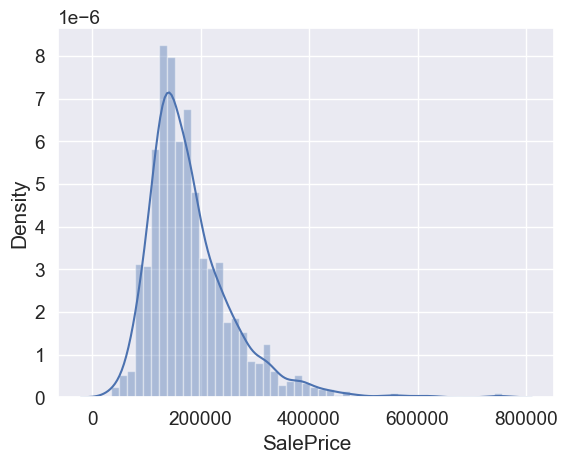

In [1047]:
# check dependent variable [SalePrice] and Regularize, if needed

print(df['SalePrice'].describe())
sns.distplot(df['SalePrice'])
print("Skewness: %f" % df['SalePrice'].skew())

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64
Skewness: 0.121335


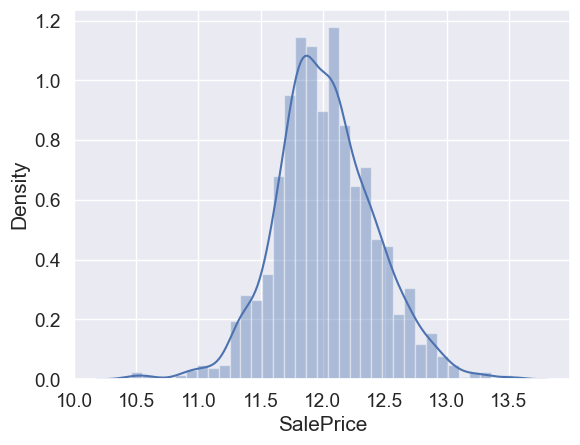

In [1048]:
# regularize with log for normal distribution
df['SalePrice'] = np.log(df.SalePrice) 

# re-check
print(df['SalePrice'].describe())
sns.distplot(df['SalePrice'])
print("Skewness: %f" % df['SalePrice'].skew())

##### Now it can be said that the dependent variable SalePrice is normally distributed.

## EDA
### Now let's check the Categorical columns and their effect on price

In [1049]:
categorical_columns = list(df.select_dtypes(include=['object']))
len(categorical_columns)

40

In [1050]:
# print("Skewness: %f" % df[categorical_columns].skew())
columns = ['name', 'skew']
skew_data = []

for c in categorical_columns:
    # skew_df.add(dict(zip(c, df[c].value_counts().skew())))
    skew_data.append([c, df[c].value_counts().skew()])

skew_df = pd.DataFrame(skew_data, columns=columns)
skew_df = skew_df.sort_values(by='skew', ascending=False)
skew_df

,name,skew
9,Condition1,2.978640
38,SaleType,2.951036
10,Condition2,2.828369
16,RoofMatl,2.828145
32,Functional,2.642535
26,BsmtFinType2,2.640606
0,MSSubClass,2.551871
27,Heating,2.448873
36,GarageCond,2.432860
35,GarageQual,2.431088


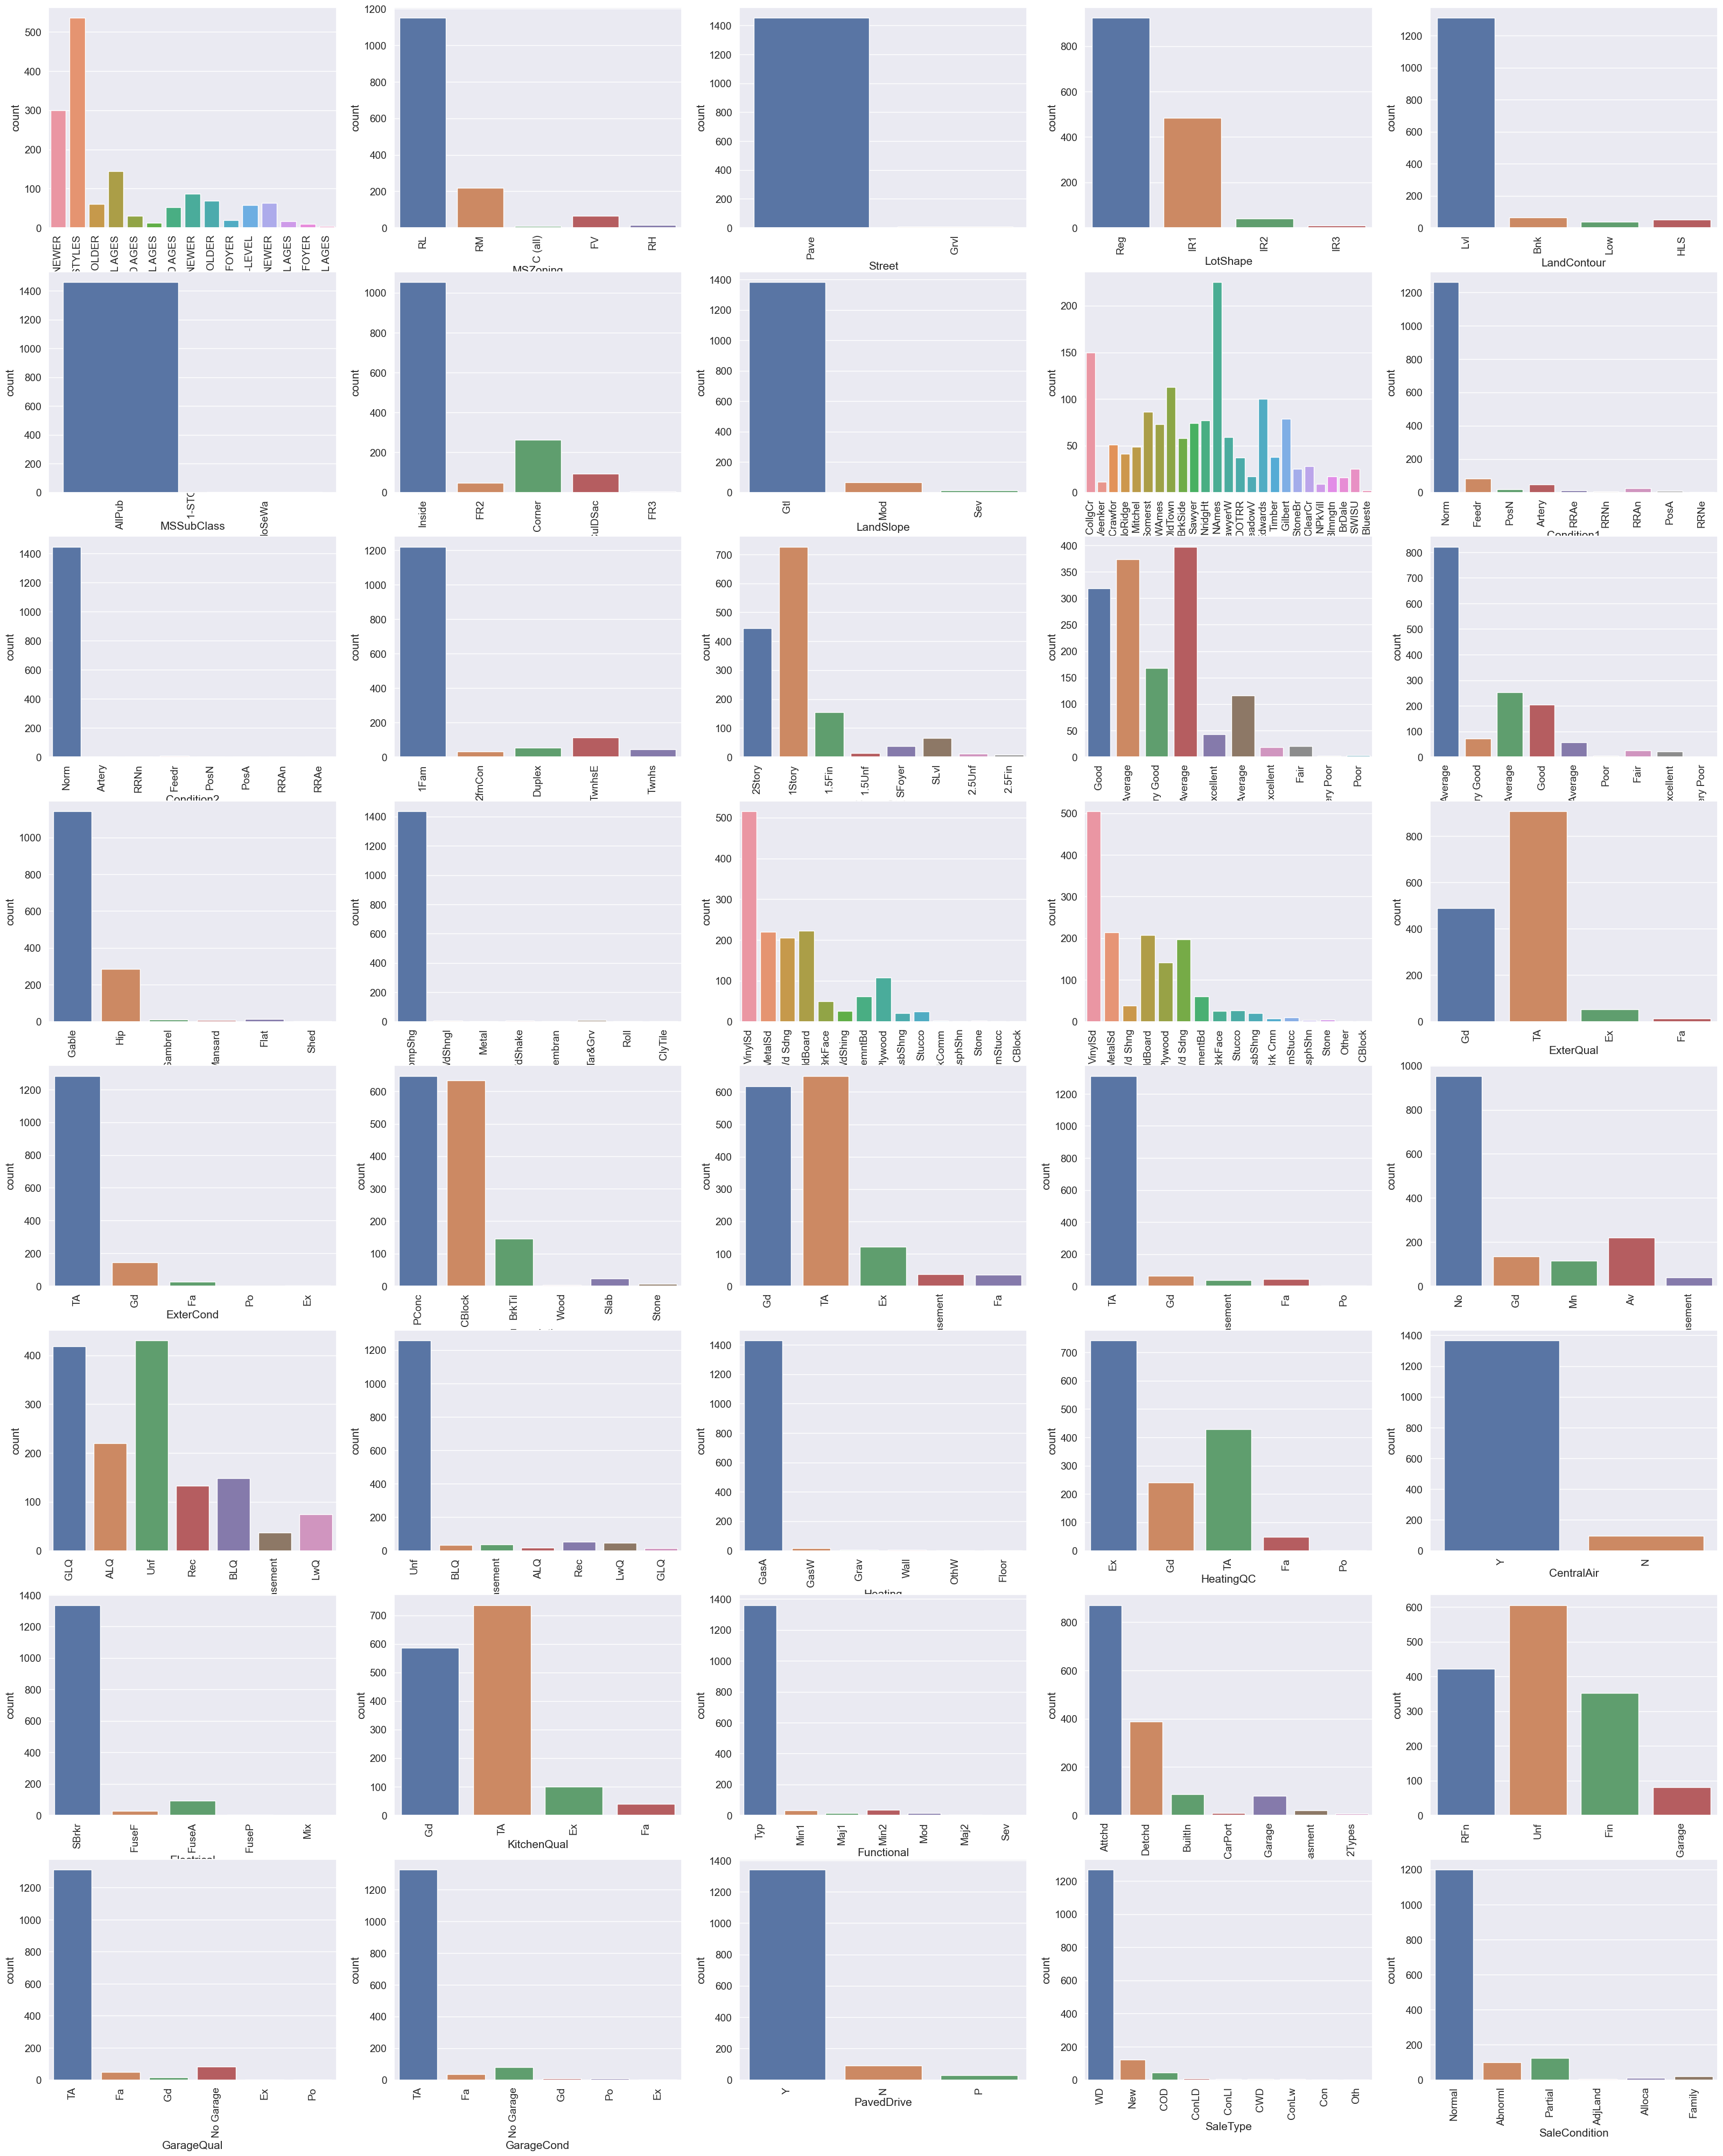

In [1051]:
# visualize counts of categorical columns
# to see if they are skewed

plt.figure(figsize=(40, 50))

for i,c in enumerate(categorical_columns):    
    plt.subplot(8,5,i+1)
    sns.countplot(x=c, data=df)
    plt.xticks(rotation=90)

plt.show()

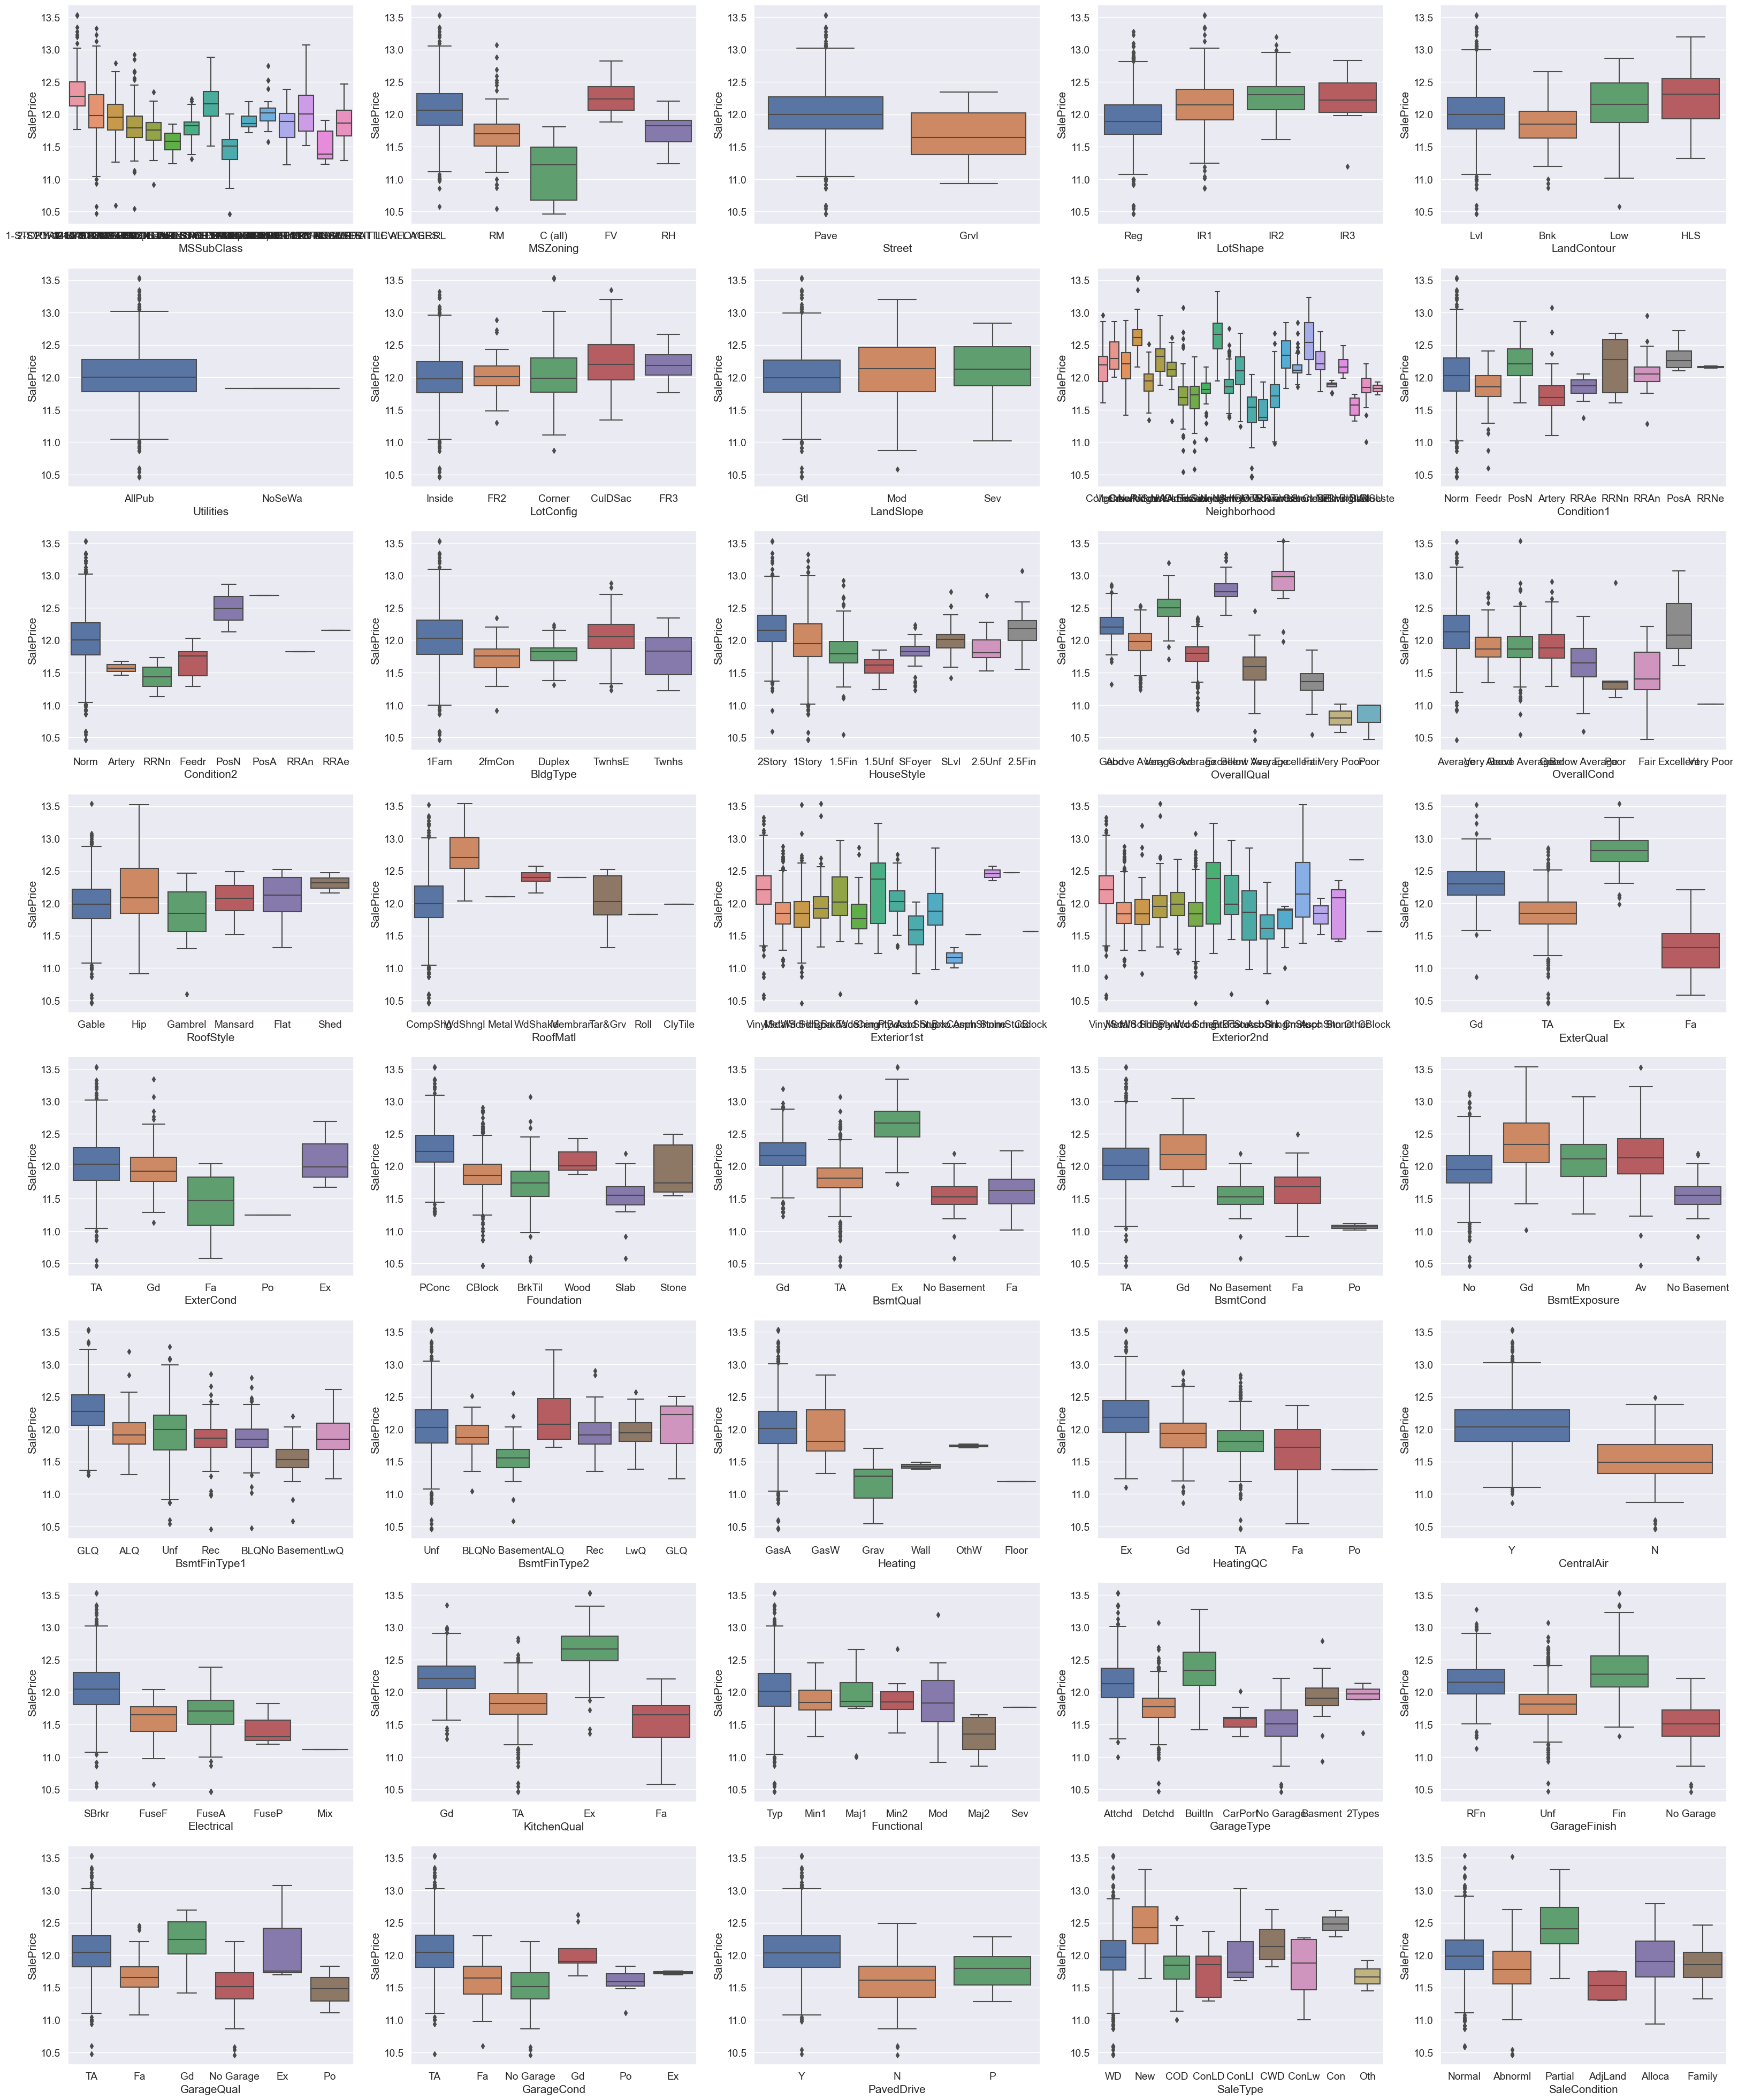

In [1052]:
plt.figure(figsize=(40, 50))

for i,c in enumerate(categorical_columns):
    plt.subplot(8,5,i+1)
    sns.boxplot(x=c, y='SalePrice', data=df)

plt.show()

#- We can see that in this group except GarageType and Garage Finsih almost all are skewed so we can drop these columns.
- Price of Builtin Garagetype and Finished garage is the highest

g7=  'Electrical', 'KitchenQual',
       'Functional'

- Majority of ExterQual, ExerCond is TA
- Poured Contrete foundation are the highest in number
- Meanwhile variables like Heating , Central Airand Exter Cond are skewed so would be dropping these variables

- Price of Excellent ExterQual and HeatingQc is highest
- Price of Poured Contrete Foundation is highest.


In [1053]:
# basing on Count Plot, Skew and Box Plot

# we can impute data for the least values where dropping of column is not advised
df['GarageType'] = df['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
df['SaleCondition'] = df['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')
df['Foundation'] = df['Foundation'].replace(['Slab','Stone','Wood'],'Others')
df['HouseStyle'] = df['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
df['RoofStyle'] = df['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
df['Exterior1st'] = df['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
df['Exterior2nd'] = df['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')
df['MSZoning'] = df['MSZoning'].replace(['RH','C (all)'],'Others')

# dropping the highly skewed columns
drop_columns = ['Condition1', 'SaleType', 'Condition2', 'RoofMatl', 'Functional', 'BsmtFinType2', 'Heating', 'GarageCond', 'GarageQual', 'BsmtCond', 'Electrical', 'ExterCond', 'LandContour', 'LandSlope', 'PavedDrive', 'Street', 'Utilities', 'CentralAir']
df = df.drop(drop_columns, axis=1)

In [1054]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,2003,2003,Gable,VinylSd,VinylSd,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,Normal,12.247694
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,MetalSd,MetalSd,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,Normal,12.109011
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,2001,2002,Gable,VinylSd,VinylSd,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,Normal,12.317167
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,Average,1915,1970,Gable,Wd Sdng,Wd Shng,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,Abnorml,11.849398
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,Average,2000,2000,Gable,VinylSd,VinylSd,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,Normal,12.429216


In [1055]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   BldgType       1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   object 
 10  OverallCond    1460 non-null   object 
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrArea     1460 non-null   float64
 17  ExterQual      1460 non-null   object 
 18  Foundati

In [1056]:
numerical_columns = list(df.select_dtypes(include=np.number).columns)
categorical_columns = list(df.select_dtypes(exclude=np.number).columns)

print(numerical_columns)
print(categorical_columns)
print(list(df.columns))

print(len(numerical_columns))
print(len(categorical_columns))
print(len(list(df.columns)))


['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition']
['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2

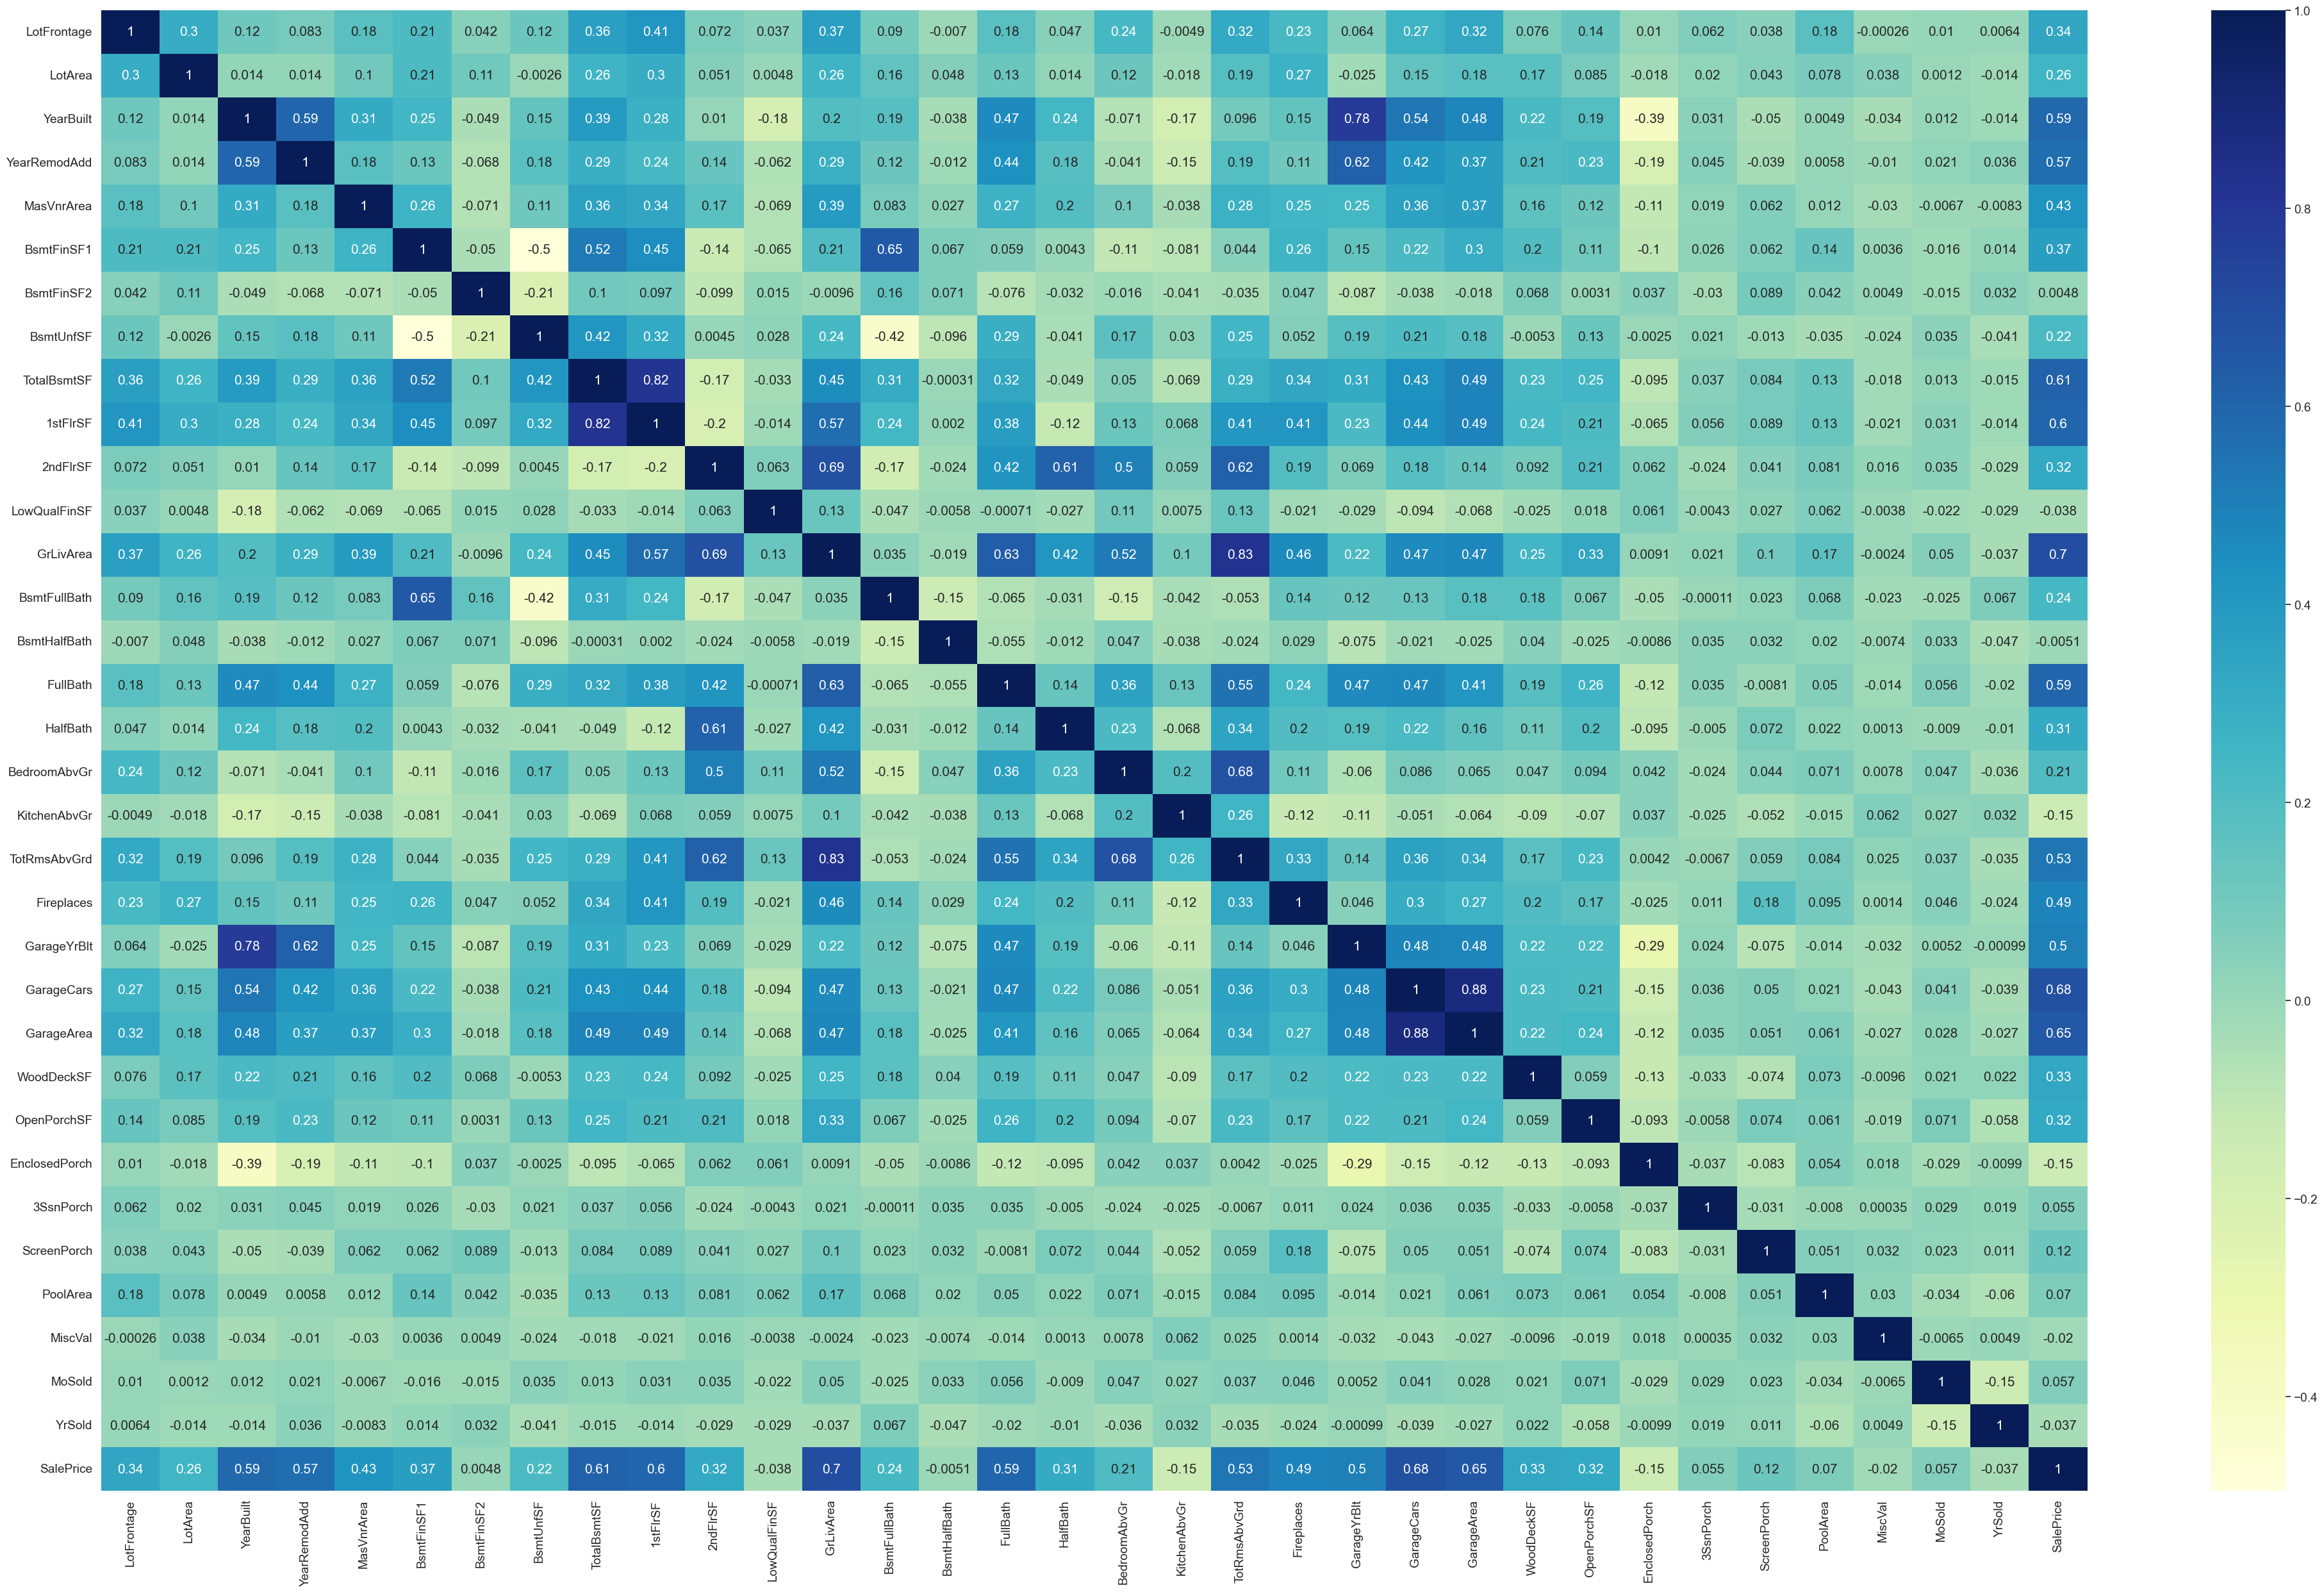

In [1057]:
plt.figure(figsize=(50,30))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='YlGnBu')
plt.show()

In [1058]:
# adding a feature
df['RemodelAge'] = df['YearRemodAdd'].max() - df['YearRemodAdd']

In [1059]:
df[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   YearBuilt      1460 non-null   int64  
 3   YearRemodAdd   1460 non-null   int64  
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  BsmtFullBath   1460 non-null   int64  
 14  BsmtHalfBath   1460 non-null   int64  
 15  FullBath       1460 non-null   int64  
 16  HalfBath       1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

In [1060]:
# create dummy variables for categorical columns
df_categorical = pd.get_dummies(df[categorical_columns], drop_first=True) 
print(df_categorical.shape)
# concat with the main dataframe
df = pd.concat([df, df_categorical], axis=1)
df = df.drop(categorical_columns, axis=1)

(1460, 127)


In [1061]:
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,RemodelAge,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,...,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694,7,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011,34,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167,8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398,40,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216,10,False,False,Fa

In [1062]:
# retaining the newly added RemodelAge 
# and dropping other year columns
# df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True) #no need of these while making a model 

In [1063]:
# collect X & y for modelling
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [1064]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                         train_size = 0.7,
#                                                         test_size = 0.3, 
#                                                         random_state = 100)
df_train, df_test = train_test_split(df,
                                     train_size = 0.7,
                                     test_size = 0.3,
                                     random_state = 100)

In [1065]:
numerical_columns_notarget = numerical_columns.copy()
numerical_columns_notarget.remove('SalePrice')

In [1066]:
scaler = StandardScaler()
# scaler = MinMaxScaler()

# X_train[numerical_columns_notarget] = scaler.fit_transform(X_train[numerical_columns_notarget])
# X_train.head()

df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])

In [1067]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [1068]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     train_size=0.7,
#                                                     test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation
- Ridge and Lasso Regression

### Ridge

In [1094]:
# list of alphas to tune
params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring = 'r2',
                        cv = folds,
                        return_train_score = True,
                        verbose = 1)
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [1095]:
optimum_alpha = model_cv.best_params_
print('Optimum Alpha: ', optimum_alpha)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 100]
cv_results.head()

Optimum Alpha:  {'alpha': 0.1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016593,0.003992,0.009100,0.002057,0.00001,{'alpha': 1e-05},0.869989,0.781101,0.831383,0.892293,0.894525,0.853858,0.042872,6,0.924998,0.936091,0.932948,0.920472,0.919418,0.926785,0.006662
1,0.014957,0.003542,0.007705,0.002610,0.0001,{'alpha': 0.0001},0.869990,0.781100,0.831383,0.892297,0.894531,0.853860,0.042874,5,0.924998,0.936091,0.932948,0.920472,0.919418,0.926785,0.006662
2,0.017450,0.003826,0.007602,0.001022,0.001,{'alpha': 0.001},0.870004,0.781091,0.831382,0.892333,0.894594,0.853881,0.042897,4,0.924998,0.936091,0.932948,0.920472,0.919418,0.926785,0.006662
3,0.018802,0.002642,0.008907,0.001751,0.01,{'alpha': 0.01},0.870140,0.781000,0.831372,0.892651,0.895199,0.854072,0.043111,3,0.924998,0.936090,0.932947,0.920471,0.919415,0.926784,0.006662
4,0.015711,0.002438,0.008704,0.001522,0.1,{'alpha': 0.1},0.871351,0.780075,0.831212,0.894399,0.899659,0.855339,0.044706,1,0.924957,0.936041,0.932890,0.920428,0.919263,0.926716,0.006682


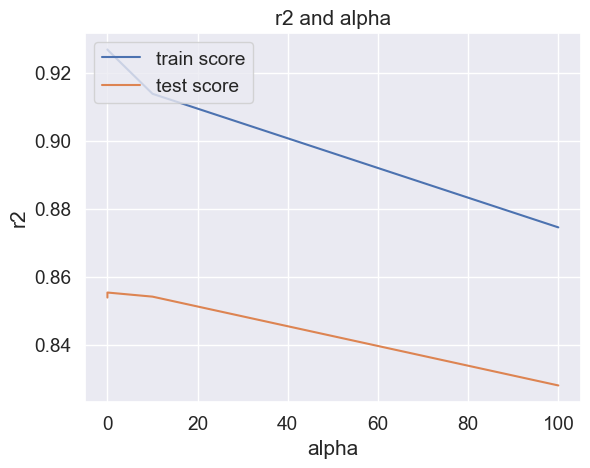

In [1096]:
# plotting mean train & test scores along with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting the graph
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')

plt.show()

In [1101]:
# basing on above optimum alpha is 10
print('Optimum Alpha: ', optimum_alpha)
ridge = Ridge(alpha=optimum_alpha['alpha'])

ridge.fit(X_train, y_train)
ridge.coef_

Optimum Alpha:  {'alpha': 0.1}


array([-3.01693504e-02,  4.01552201e-02,  1.00634657e-01,  1.28765681e-04,
       -4.60471255e-04, -2.27802913e-02,  2.64630630e-05,  2.58076423e-02,
        2.16095957e-03,  7.32184852e-02,  1.16367578e-01, -5.52488157e-03,
        1.49487681e-01,  6.37651754e-02,  1.06200473e-02,  7.16491484e-02,
        5.09207569e-02,  9.12395689e-03, -5.95652534e-02,  4.07354844e-02,
        4.89711521e-02, -7.36998095e-03,  8.85536776e-02,  1.31682815e-02,
        3.09741982e-02, -8.85610738e-03,  2.87080285e-02,  1.68377838e-02,
        2.85840203e-02, -2.71704412e-02, -4.42171753e-03,  6.17743758e-04,
       -2.37193431e-02, -2.65520902e-03,  6.63794800e-02, -2.41832285e-01,
        4.49501732e-02, -8.93673991e-02, -1.13804322e-01,  8.40433595e-04,
        1.49888555e-01,  2.96701427e-02, -1.20969122e-01, -2.55900954e-01,
        5.76069357e-02, -1.66234364e-01,  6.29044483e-02, -3.81850859e-02,
       -2.92886580e-01, -6.20031477e-02, -8.85185937e-02,  7.47770579e-02,
       -1.31298520e-01,  

In [1102]:
# print ridge score with optimum alpha
print('Alpha: ', optimum_alpha['alpha'], ' => Ridge Score:')
print('Train: ' , ridge.score(X_train,y_train))
print('Test: ' , ridge.score(X_test,y_test))

Alpha:  0.1  => Ridge Score:
Train:  0.9212172818478634
Test:  0.8793046041474403


In [1103]:
# listing Ridge Model parameters
model_params = list(sorted(ridge.coef_))
model_params.insert(0, ridge.intercept_)
model_params = [round(x, 3) for x in model_params]
columns = X.columns
columns = columns.insert(0, "Intercept")
list(zip(columns, model_params))

[('Intercept', 0.347),
 ('LotFrontage', -1.267),
 ('LotArea', -0.58),
 ('YearBuilt', -0.572),
 ('YearRemodAdd', -0.447),
 ('MasVnrArea', -0.447),
 ('BsmtFinSF1', -0.395),
 ('BsmtFinSF2', -0.366),
 ('BsmtUnfSF', -0.361),
 ('TotalBsmtSF', -0.295),
 ('1stFlrSF', -0.295),
 ('2ndFlrSF', -0.293),
 ('LowQualFinSF', -0.271),
 ('GrLivArea', -0.256),
 ('BsmtFullBath', -0.255),
 ('BsmtHalfBath', -0.251),
 ('FullBath', -0.243),
 ('HalfBath', -0.242),
 ('BedroomAbvGr', -0.224),
 ('KitchenAbvGr', -0.221),
 ('TotRmsAbvGrd', -0.207),
 ('Fireplaces', -0.206),
 ('GarageYrBlt', -0.197),
 ('GarageCars', -0.194),
 ('GarageArea', -0.192),
 ('WoodDeckSF', -0.19),
 ('OpenPorchSF', -0.187),
 ('EnclosedPorch', -0.177),
 ('3SsnPorch', -0.171),
 ('ScreenPorch', -0.166),
 ('PoolArea', -0.162),
 ('MiscVal', -0.159),
 ('MoSold', -0.158),
 ('YrSold', -0.156),
 ('RemodelAge', -0.137),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.132),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.131),
 ('MSSubClass_1-STORY 1946 & NEWER

## Lasso

In [1104]:
# params = {'alpha': [0.00006, 0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008]}
params = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 10, 20]}
lasso = Lasso()

# GridSearch Cross Validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)
optimum_alpha = model_cv.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [1105]:
print('Optimum Alpha: ', optimum_alpha)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

Optimum Alpha:  {'alpha': 0.0001}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.132773,0.013941,0.008107,0.001117,0.000001,{'alpha': 1e-06},0.870022,0.781106,0.831405,0.892606,0.894605,0.853949,0.042942,4,0.924998,0.936091,0.932948,0.920471,0.919418,0.926785,0.006662
1,0.162438,0.058294,0.007804,0.001721,0.00001,{'alpha': 1e-05},0.870365,0.780978,0.831658,0.893353,0.895293,0.854329,0.043249,3,0.924993,0.936085,0.932941,0.920462,0.919409,0.926778,0.006663
2,0.145822,0.006719,0.007298,0.001470,0.0001,{'alpha': 0.0001},0.873318,0.778889,0.832594,0.895773,0.900310,0.856177,0.045473,1,0.924747,0.935783,0.932619,0.920245,0.918943,0.926467,0.006677
3,0.069034,0.011047,0.007200,0.001719,0.001,{'alpha': 0.001},0.886130,0.751717,0.828326,0.901939,0.912546,0.856132,0.059760,2,0.917062,0.928907,0.925184,0.913294,0.910355,0.918960,0.007035
4,0.023608,0.003892,0.006203,0.001726,0.01,{'alpha': 0.01},0.872967,0.642815,0.787537,0.861459,0.864798,0.805915,0.087164,5,0.852575,0.872441,0.865931,0.851779,0.842471,0.857039,0.010734


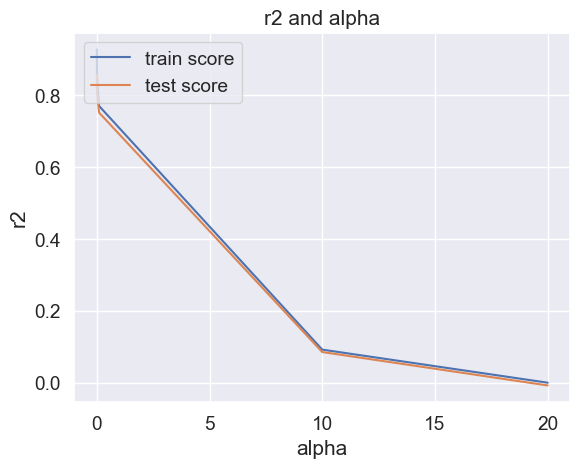

In [1106]:
# plotting the mean test and training scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1107]:
print('Optimum Alpha: ', optimum_alpha)
alpha = optimum_alpha['alpha']
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Optimum Alpha:  {'alpha': 0.0001}


Lasso(alpha=0.0001)

In [1108]:
lasso.coef_

array([-2.83578374e-02,  4.02427780e-02,  1.04244445e-01,  1.33018559e-01,
       -6.91811294e-05, -1.90716549e-02,  6.30766927e-04,  2.63604476e-02,
        0.00000000e+00,  1.23500396e-01,  1.68870199e-01, -6.64588323e-04,
        8.66333183e-02,  6.37604286e-02,  1.03990373e-02,  7.08933718e-02,
        4.90204881e-02,  1.00440826e-02, -5.97681766e-02,  3.97249974e-02,
        4.94730088e-02, -7.71575493e-03,  9.06490157e-02,  1.04755629e-02,
        3.05524416e-02, -7.63936212e-03,  2.84929424e-02,  1.66129126e-02,
        2.88000458e-02, -2.78407137e-02, -4.64060723e-03, -0.00000000e+00,
       -2.38520919e-02,  3.71573201e-03,  3.62319338e-02, -2.34288694e-01,
        5.34056507e-02, -5.88729580e-02, -6.46465148e-02, -0.00000000e+00,
        1.39361436e-01,  2.89770904e-02, -1.13870702e-01, -2.42455368e-01,
        5.85262469e-02, -1.12892574e-01,  5.90221694e-02, -0.00000000e+00,
       -2.70721182e-01, -4.42779563e-02, -7.77993714e-02,  7.06559203e-02,
       -1.27708089e-01,  

In [1111]:
print('Alpha: ', optimum_alpha['alpha'], ' => Lasso Score:')
print('Train: ' , lasso.score(X_train,y_train))
print('Test: ' , lasso.score(X_test,y_test))

Alpha:  0.0001  => Lasso Score:
Train:  0.9209786266433511
Test:  0.8807280483737678


In [1110]:
# lasso model parameters
model_params = list(sorted(lasso.coef_))
model_params.insert(0, lasso.intercept_)
model_params = [round(x, 3) for x in model_params]
columns = X.columns
columns = columns.insert(0, "constant")
list((zip(columns, model_params)))

[('constant', 0.295),
 ('LotFrontage', -1.265),
 ('LotArea', -0.744),
 ('YearBuilt', -0.587),
 ('YearRemodAdd', -0.529),
 ('MasVnrArea', -0.51),
 ('BsmtFinSF1', -0.371),
 ('BsmtFinSF2', -0.336),
 ('BsmtUnfSF', -0.271),
 ('TotalBsmtSF', -0.259),
 ('1stFlrSF', -0.254),
 ('2ndFlrSF', -0.242),
 ('LowQualFinSF', -0.235),
 ('GrLivArea', -0.234),
 ('BsmtFullBath', -0.231),
 ('BsmtHalfBath', -0.223),
 ('FullBath', -0.221),
 ('HalfBath', -0.22),
 ('BedroomAbvGr', -0.196),
 ('KitchenAbvGr', -0.195),
 ('TotRmsAbvGrd', -0.184),
 ('Fireplaces', -0.181),
 ('GarageYrBlt', -0.18),
 ('GarageCars', -0.18),
 ('GarageArea', -0.179),
 ('WoodDeckSF', -0.166),
 ('OpenPorchSF', -0.166),
 ('EnclosedPorch', -0.163),
 ('3SsnPorch', -0.162),
 ('ScreenPorch', -0.153),
 ('PoolArea', -0.152),
 ('MiscVal', -0.152),
 ('MoSold', -0.145),
 ('YrSold', -0.134),
 ('RemodelAge', -0.132),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.128),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.124),
 ('MSSubClass_1-STORY 1946 & NEWER AL

## Conclusion :

- we got a decent score for both Ridge and Lasso regression.
- Ridge : Train :90.9    Test :87.4
- Lasso : Train :89.8    Test :86.4

### Top 5 most significant variables in Ridge are:

- ('SaleCondition_Partial', 0.143)
- ('SaleCondition_Others', 0.105)
- ('SaleCondition_Normal', 0.099)
- ('GarageFinish_Unf', 0.094)
- ('GarageFinish_RFn', 0.092)

### Top 5 most significant variables in Lasso are:

- ('SaleCondition_Partial', 0.198)
- ('SaleCondition_Others', 0.12)
- ('SaleCondition_Normal', 0.098)
- ('GarageFinish_Unf', 0.084)
- ('GarageFinish_RFn', 0.079)


### These Varaiables are directly proportional to each other.

- Optimal Value of lamda for ridge : 10
- Optimal Value of lamda for Lasso : 0.001

### Because of Feature selection we can choose Lasso regression in this case.